# Hands On: Data Quality and Pre-Processing

## 1. Assessing Data Quality

Load the following packages: dplyr, na.tools, tidyimpute (version from github
decisionpatterns/tidyimpute”)

Load the carInsurance data set about the insurance risk rating of cars based on several characteristics of 
each car


In [37]:
# Instalar paquete dplyr
install.packages("dplyr")
# Instalar paquete na.tools
install.packages("na.tools")
# Instalar paquete devtools
install.packages("devtools")

#Instalar paquete necesario para dplyr
install.packages('lifecycle')


Warning message:
"package 'dplyr' is in use and will not be installed"
Warning message:
"package 'na.tools' is in use and will not be installed"
Warning message:
"package 'devtools' is in use and will not be installed"


package 'lifecycle' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\aleja\AppData\Local\Temp\RtmpEJsNan\downloaded_packages


In [38]:
# Cargar paquetes
library(dplyr)
library(na.tools)
library(devtools)

# Instalar y cargar tidyimpute desde github
devtools::install_github("decisionpatterns/tidyimpute")
library(tidyimpute)


Please download and install Rtools 4.0 from https://cran.r-project.org/bin/windows/Rtools/.

Skipping install of 'tidyimpute' from a github remote, the SHA1 (9e07748f) has not changed since last install.
  Use `force = TRUE` to force installation



### (a) Check if there are any missing values.
Tip: use the function any_na().


In [39]:
df <- read.csv("../datasets/imports-85.data")

# Vector de nombres de las columnas
nombres <- c("symboling", "normalized-losses", "make", 
             "fuel-type", "aspiration", "num-of-doors", 
             "body-style", "drive-wheels", "engine-location",
            "wheel-base", "length", "width", "height", "curb-weight",
            "engine-type", "num-of-cylinders", "engine-size", "fuel-system",
            "bore", "stroke", "compression-ratio", "horsepower",
            "peak-rpm", "city-mpg", "highway-mpg", "price")  # Agrega los nombres deseados para cada columna

# Asignar los nombres a las columnas del dataframe
colnames(df) <- nombres

head(df)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,...,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710


In [40]:
anyNA(df)


[1] FALSE

### (b) Count the number of cases that have, at least, one missing value.
Tip: use the function filter_any_na() and then count().


In [41]:
#Para poder usar el pipe de R
library(magrittr)

In [42]:
# Contar valores nulos por columna
valores_nulos <- colSums(is.na(df))

# Imprimir los valores nulos por columna
print(valores_nulos)

        symboling normalized-losses              make         fuel-type 
                0                 0                 0                 0 
       aspiration      num-of-doors        body-style      drive-wheels 
                0                 0                 0                 0 
  engine-location        wheel-base            length             width 
                0                 0                 0                 0 
           height       curb-weight       engine-type  num-of-cylinders 
                0                 0                 0                 0 
      engine-size       fuel-system              bore            stroke 
                0                 0                 0                 0 
compression-ratio        horsepower          peak-rpm          city-mpg 
                0                 0                 0                 0 
      highway-mpg             price 
                0                 0 


Como se puede apreciar no existen valores faltantes, pero esto se debe a que dichos valores estan representados por "?", entonces lo que vamos hacer es contar esos valores.

In [43]:
# Contar valores iguales a "?" por columna
interrogantes <- colSums(df == "?", na.rm = FALSE)

# Imprimir los valores iguales a "?" por columna
print(interrogantes)

        symboling normalized-losses              make         fuel-type 
                0                40                 0                 0 
       aspiration      num-of-doors        body-style      drive-wheels 
                0                 2                 0                 0 
  engine-location        wheel-base            length             width 
                0                 0                 0                 0 
           height       curb-weight       engine-type  num-of-cylinders 
                0                 0                 0                 0 
      engine-size       fuel-system              bore            stroke 
                0                 0                 4                 4 
compression-ratio        horsepower          peak-rpm          city-mpg 
                0                 2                 2                 0 
      highway-mpg             price 
                0                 4 


### (c) Create a new data set by removing all the cases that have missing values.
Tip: use the function drop_rows_any_na()


In [44]:
# Crear un nuevo dataset sin filas que contengan "?"
n_df <- df[!(apply(df, 1, function(x) any(x == "?"))), ]

# Imprimir el nuevo dataset
head(n_df)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,...,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
11,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16925


### (d) Create a new data set by imputing all the missing values with 0.
Tip: explore the variants of the function impute()

In [45]:
# Reemplazar todos los "?" por 0 en el dataframe
n0_df <- replace(df, df == "?", 0)

# Imprimir el dataframe con los valores reemplazados
head(n0_df)

# Convertir columnas factor a caracteres, debido a que gas tiene 2 "?" pero es una columna de tipo factor
df_caracteres <- as.data.frame(lapply(df, as.character), stringsAsFactors = FALSE)

# Reemplazar "?" por 0 en el dataframe
n1_df <- replace(df_caracteres, df_caracteres == "?", 0)

# Imprimir el dataframe con los valores reemplazados
head(n1_df)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,...,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710


,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450
5,2,0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710


### (e) Create a new data set by imputing the mean in all the columns which have double type values.

In [46]:
# Convertir columnas factor a caracteres
df_caracteres <- as.data.frame(lapply(df, as.character), stringsAsFactors = FALSE)

# Reemplazar "?" por 0 en el dataframe
ndf <- replace(df_caracteres, df_caracteres == "?", '')

# Imprimir el dataframe con los valores reemplazados
head(ndf)

,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,3,,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450
5,2,,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710


In [47]:
str(ndf)

'data.frame':	204 obs. of  26 variables:
 $ symboling        : chr  "3" "1" "2" "2" ...
 $ normalized.losses: chr  "" "" "164" "164" ...
 $ make             : chr  "alfa-romero" "alfa-romero" "audi" "audi" ...
 $ fuel.type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num.of.doors     : chr  "two" "two" "four" "four" ...
 $ body.style       : chr  "convertible" "hatchback" "sedan" "sedan" ...
 $ drive.wheels     : chr  "rwd" "rwd" "fwd" "4wd" ...
 $ engine.location  : chr  "front" "front" "front" "front" ...
 $ wheel.base       : chr  "88.6" "94.5" "99.8" "99.4" ...
 $ length           : chr  "168.8" "171.2" "176.6" "176.6" ...
 $ width            : chr  "64.1" "65.5" "66.2" "66.4" ...
 $ height           : chr  "48.8" "52.4" "54.3" "54.3" ...
 $ curb.weight      : chr  "2548" "2823" "2337" "2824" ...
 $ engine.type      : chr  "dohc" "ohcv" "ohc" "ohc" ...
 $ num.of.cylinders : chr  "four" "six" "four" "five" ...
 $ engine.size    

In [48]:
# Convertir una columna de tipo chr a flotante
ndf$symboling <- as.numeric(ndf$symboling)
ndf$normalized.losses <- as.numeric(ndf$normalized.losses)
ndf$wheel.base <- as.numeric(ndf$wheel.base)
ndf$length <- as.numeric(ndf$length)
ndf$width <- as.numeric(ndf$width)
ndf$height <- as.numeric(ndf$height)
ndf$curb.weight <- as.numeric(ndf$curb.weight)
ndf$engine.size <- as.numeric(ndf$engine.size)
ndf$bore <- as.numeric(ndf$bore)
ndf$stroke <- as.numeric(ndf$stroke)
ndf$compression.ratio <- as.numeric(ndf$compression.ratio)
ndf$horsepower <- as.numeric(ndf$horsepower)
ndf$peak.rpm <- as.numeric(ndf$peak.rpm)
ndf$city.mpg <- as.numeric(ndf$city.mpg)
ndf$highway.mpg <- as.numeric(ndf$highway.mpg)
ndf$price <- as.numeric(ndf$price)

In [49]:
str(ndf)

'data.frame':	204 obs. of  26 variables:
 $ symboling        : num  3 1 2 2 2 1 1 1 0 2 ...
 $ normalized.losses: num  NA NA 164 164 NA 158 NA 158 NA 192 ...
 $ make             : chr  "alfa-romero" "alfa-romero" "audi" "audi" ...
 $ fuel.type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num.of.doors     : chr  "two" "two" "four" "four" ...
 $ body.style       : chr  "convertible" "hatchback" "sedan" "sedan" ...
 $ drive.wheels     : chr  "rwd" "rwd" "fwd" "4wd" ...
 $ engine.location  : chr  "front" "front" "front" "front" ...
 $ wheel.base       : num  88.6 94.5 99.8 99.4 99.8 ...
 $ length           : num  169 171 177 177 177 ...
 $ width            : num  64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 67.9 64.8 ...
 $ height           : num  48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 52 54.3 ...
 $ curb.weight      : num  2548 2823 2337 2824 2507 ...
 $ engine.type      : chr  "dohc" "ohcv" "ohc" "ohc" ...
 $ num.of.cylinders : chr  "fou

In [50]:
# Identificar las columnas numéricas
columnas_numericas <- sapply(ndf, is.numeric)

# Calcular la media de cada columna numérica
medias <- sapply(ndf[, columnas_numericas], mean, na.rm = TRUE)

# Reemplazar los NA por la media en las columnas numéricas
df_imputado1 <- ndf
df_imputado1[, columnas_numericas] <- lapply(df_imputado1[, columnas_numericas], function(x) {
  is_na <- is.na(x)
  x[is_na] <- medias[is_na]
  return(x)
})

# Imprimir el nuevo dataframe imputado
head(df_imputado1)


,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,...,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,0.8235294,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0000000,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0000000,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0000000,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,65.9166667,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158.0000000,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710


### (f) Create a new data set by imputing the mode in all the columns which have integer type values.

In [51]:
# Creamos la funcion para calcular la moda
mode <- function(x) {
   return(as.numeric(names(which.max(table(x)))))
}

In [52]:
# Identificar las columnas numéricas
columnas_numericas <- sapply(ndf, is.numeric)

# Reemplazar los NA por la moda en las columnas numéricas
df_imputado <- ndf
df_imputado[, columnas_numericas] <- lapply(df_imputado[, columnas_numericas], function(x) {
  is_na <- is.na(x)
  x[is_na] <- mode(x[!is_na])
  return(x)
})

# Imprimir el nuevo dataframe imputado
head(df_imputado)


,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,...,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,161,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,161,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710


### (g) Create a new data set by imputing the most frequent value to the column ”nDoors”.
Tip: use the function impute_replace()


In [53]:
df1 <- df_imputado

In [54]:
# Calcular la moda de la columna factor
moda <- as.character(names(which.max(table(df1$num.of.doors))))

# Imprimir la moda
print(moda)

[1] "four"


In [55]:
# Convertir la columna a tipo factor
columna_factor <- as.factor(df1$num.of.doors)

# Obtener todos los niveles de la columna factor
niveles <- levels(columna_factor)

# Imprimir los niveles
print(niveles)

[1] ""     "four" "two" 


In [56]:
# Reemplazar "?" por 0 en el dataframe
ndors <- replace(df1$num.of.doors, df1$num.of.doors == "", moda)

In [57]:
# Reamplazamos los valores de ndors en la matriz
df1$num.of.doors <- ndors
# Convertir la columna a tipo factor
columna_factor <- as.factor(df1$num.of.doors)

# Obtener todos los niveles de la columna factor
niveles <- levels(columna_factor)

# Imprimir los niveles
print(niveles)

[1] "four" "two" 


### (h) Combine the three last imputations to obtain a final dataset. Are there any duplicated cases?
Tip: use the functions distinct() and count()


In [58]:
dff <- df1
dff$normalized.losses <- df_imputado1$normalized.losses

In [59]:
head(dff)

,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,...,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,0.8235294,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0000000,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0000000,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0000000,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,65.9166667,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158.0000000,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710


In [60]:
str(dff)

'data.frame':	204 obs. of  26 variables:
 $ symboling        : num  3 1 2 2 2 1 1 1 0 2 ...
 $ normalized.losses: num  0.824 122 164 164 65.917 ...
 $ make             : chr  "alfa-romero" "alfa-romero" "audi" "audi" ...
 $ fuel.type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num.of.doors     : chr  "two" "two" "four" "four" ...
 $ body.style       : chr  "convertible" "hatchback" "sedan" "sedan" ...
 $ drive.wheels     : chr  "rwd" "rwd" "fwd" "4wd" ...
 $ engine.location  : chr  "front" "front" "front" "front" ...
 $ wheel.base       : num  88.6 94.5 99.8 99.4 99.8 ...
 $ length           : num  169 171 177 177 177 ...
 $ width            : num  64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 67.9 64.8 ...
 $ height           : num  48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 52 54.3 ...
 $ curb.weight      : num  2548 2823 2337 2824 2507 ...
 $ engine.type      : chr  "dohc" "ohcv" "ohc" "ohc" ...
 $ num.of.cylinders : chr  "four" "six" "

## 2. Data Pre-Processing


Load the package dlookr. Use the same car insurance data set above and apply the following 
transformations to the price attribute. Be critical regarding the obtained results.

In [61]:
install.packages("gdtools")
install.packages("dlookr")


package 'gdtools' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'gdtools'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\ProgramData\anaconda3\envs\r-data\Lib\R\library\00LOCK\gdtools\libs\x64\gdtools.dll  a C:\ProgramData\anaconda3\envs\r-data\Lib\R\library\gdtools\libs\x64\gdtools.dll: Permission denied"
Warning message:
"restored 'gdtools'"



The downloaded binary packages are in
	C:\Users\aleja\AppData\Local\Temp\RtmpEJsNan\downloaded_packages


Warning message:
"package 'dlookr' is in use and will not be installed"


In [62]:
library(dlookr)


### (a) Apply range-based normalization and z-score normalization.
Tip: use the function transform().

In [63]:
df <- dff
# Normalización basada en rango
dff$price_range_normalized <- (dff$price - min(dff$price)) / (max(dff$price) - min(dff$price))

# Normalización z-score
dff$price_zscore <- (dff$price - mean(dff$price)) / sd(dff$price)

In [64]:
print(dff[c("price_range_normalized", "price_zscore")])

    price_range_normalized price_zscore
1             0.2825579663   0.43270907
2             0.2825579663   0.43270907
3             0.2192542575   0.11232252
4             0.3061417010   0.55206876
5             0.2515267365   0.27565684
6             0.3125961968   0.58473562
7             0.3426344273   0.73676218
8             0.4656422223   1.35931721
9             0.0112705427  -0.94030433
10            0.2808202175   0.42391414
11            0.2931085845   0.48610682
12            0.3935256442   0.99432783
13            0.3968770170   1.01128947
14            0.4827714612   1.44601004
15            0.6365622362   2.22436088
16            0.8985899409   3.55050990
17            0.7884911375   2.99328859
18            0.0008192245  -0.99319952
19            0.0292190060  -0.84946532
20            0.0361700015  -0.81428562
21            0.0112705427  -0.94030433
22            0.0312546547  -0.83916270
23            0.0704781292  -0.64064868
24            0.0275805571  -0.85775768


### (b) Discretize it into 4 equal-frequency ranges an into 4 equal-width ranges.
Tip: use the function binning().

In [65]:
dff <- df
# Discretización en 4 rangos de frecuencia iguales
dff$price_equal_frequency <- cut(dff$price, breaks = 4, labels = FALSE)

# Discretización en 4 rangos de ancho igual
dff$price_equal_width <- cut(dff$price, breaks = 4, labels = FALSE, include.lowest = TRUE)

print(dff[c("price_equal_frequency", "price_equal_width")])

    price_equal_frequency price_equal_width
1                       2                 2
2                       2                 2
3                       1                 1
4                       2                 2
5                       2                 2
6                       2                 2
7                       2                 2
8                       2                 2
9                       1                 1
10                      2                 2
11                      2                 2
12                      2                 2
13                      2                 2
14                      2                 2
15                      3                 3
16                      4                 4
17                      4                 4
18                      1                 1
19                      1                 1
20                      1                 1
21                      1                 1
22                      1       

## 3. With the seed 111019 obtain the following samples on the car insurance data set.
Tip: use the function sample_frac()


In [66]:
# Establecer la semilla
set.seed(111019)

### (a) A random sample of 60% of the cases, with replacement


In [77]:
print("Filas del DataFrame Incial")
print(nrow(df))

[1] "Filas del DataFrame Incial"
[1] 204


In [79]:
# (a) Muestra aleatoria del 60% de los casos con reemplazo
df_a <- sample_frac(df, 0.6, replace = TRUE)

In [80]:
print("Muestra aleatoria del 60% de los casos con reemplazo:")
print(nrow(df_a))

[1] "Muestra aleatoria del 60% de los casos con reemplazo:"
[1] 122


In [86]:
head(df_a)

,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,...,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,128,nissan,gas,std,two,sedan,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,6649
2,3,NA,porsche,gas,std,two,convertible,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,37028
3,-1,74,plymouth,gas,std,four,wagon,fwd,front,103.3,...,122,2bbl,3.35,3.46,8.5,88,5000,24,30,8921
4,2,NA,isuzu,gas,std,two,hatchback,rwd,front,96.0,...,119,spfi,3.43,3.23,9.2,90,5000,24,29,11048
5,1,118,dodge,gas,turbo,two,hatchback,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,7957
6,0,102,subaru,gas,turbo,four,sedan,4wd,front,97.0,...,108,mpfi,3.62,2.64,7.7,111,4800,24,29,11259


### (b) A stratified sample of 60% of the cases of cars, according to the fuelType attribute.


In [78]:
print("Filas del DataFrame Incial")
print(nrow(df))

[1] "Filas del DataFrame Incial"
[1] 204


In [83]:
# (b) Muestra estratificada del 60% de los casos de autos según el atributo fuelType
df_b <- df %>% 
    group_by(fuel.type) %>% 
        sample_frac(0.6, replace = FALSE)

In [84]:
print(" A stratified sample of 60% of the cases of cars, according to the fuelType attribute.")
print(nrow(df_b))

[1] " A stratified sample of 60% of the cases of cars, according to the fuelType attribute."
[1] 122


In [85]:
head(df_b)

symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,...,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-1,93,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,25552
0,91,toyota,diesel,std,four,sedan,fwd,front,95.7,...,110,idi,3.27,3.35,22.5,56,4500,34,36,7898
0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.70,3.52,21.0,95,4150,28,33,13200
2,122,volkswagen,diesel,std,two,sedan,fwd,front,97.3,...,97,idi,3.01,3.40,23.0,52,4800,37,46,7775
0,NA,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845
1,128,nissan,diesel,std,two,sedan,fwd,front,94.5,...,103,idi,2.99,3.47,21.9,55,4800,45,50,7099


### (c) Use the table() function to inspect the distribution of values in each of the two samples above.

In [89]:
# (c) Inspeccionar la distribución de valores en cada una de las dos muestras
table_a <- table(df_a$fuel.type)
table_b <- table(df_b$fuel.type)

In [90]:
print("Table A")
print(table_a)
print("Table B")
print(table_b)

[1] "Table A"

diesel    gas 
    16    106 
[1] "Table B"

diesel    gas 
    12    110 


## 4. Load the package corrplot and select the numeric attributes of the car insurance data set.


In [91]:
# Intalar la libreria 
install.packages("corrplot")

# Cargar la biblioteca "corrplot"
library(corrplot)

package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\aleja\AppData\Local\Temp\RtmpEJsNan\downloaded_packages


corrplot 0.92 loaded



In [110]:
# Contar los NA en cada columna del dataframe
na_counts <- colSums(is.na(df))

# Mostrar los resultados
print(na_counts)

        symboling normalized.losses              make         fuel.type 
                0                32                 0                 0 
       aspiration      num.of.doors        body.style      drive.wheels 
                0                 0                 0                 0 
  engine.location        wheel.base            length             width 
                0                 0                 0                 0 
           height       curb.weight       engine.type  num.of.cylinders 
                0                 0                 0                 0 
      engine.size       fuel.system              bore            stroke 
                0                 0                 0                 0 
compression.ratio        horsepower          peak.rpm          city.mpg 
                0                 0                 0                 0 
      highway.mpg             price 
                0                 0 


In [114]:
# Seleccionar solo las columnas numéricas del dataframe
numeric_columns <- df[sapply(df, is.numeric)]

# Calcular la media de cada columna numérica (ignorando los NA)
column_means <- colMeans(numeric_columns, na.rm = TRUE)

# Reemplazar los NA por la media de cada columna numérica
dataframe_replaced <- replace(numeric_columns, is.na(numeric_columns), column_means)

# Asignar los valores reemplazados al dataframe original
df[sapply(df, is.numeric)] <- dataframe_replaced


In [115]:
# Contar los NA en cada columna del dataframe
na_counts <- colSums(is.na(df))

# Mostrar los resultados
print(na_counts)

        symboling normalized.losses              make         fuel.type 
                0                 0                 0                 0 
       aspiration      num.of.doors        body.style      drive.wheels 
                0                 0                 0                 0 
  engine.location        wheel.base            length             width 
                0                 0                 0                 0 
           height       curb.weight       engine.type  num.of.cylinders 
                0                 0                 0                 0 
      engine.size       fuel.system              bore            stroke 
                0                 0                 0                 0 
compression.ratio        horsepower          peak.rpm          city.mpg 
                0                 0                 0                 0 
      highway.mpg             price 
                0                 0 


### (a) Using the function cor(), obtain the pearson correlation coefficient between each pair of variables.

In [116]:
# Calcular el coeficiente de correlación de Pearson entre cada par de variables
cor_pearson <- cor(df[sapply(df, is.numeric)])

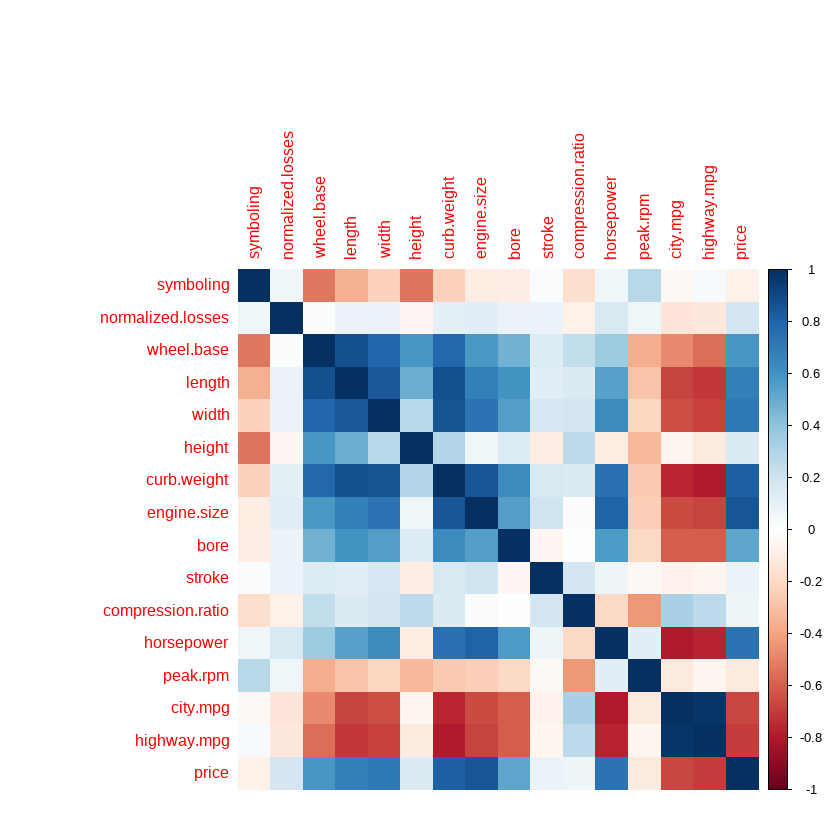

In [117]:
# Graficar la matriz de correlación
corrplot(cor_pearson, method = "color", type = "full")

### (b) Apply the function cor.mtest() to the previous result to calculate the p-values and confidence intervals of the correlation coefficient for each pair of variables.


In [119]:
# Calcular los valores p y los intervalos de confianza del coeficiente de correlación
cor_test <- cor.mtest(cor_pearson)

In [122]:
head(cor_test)

,symboling,normalized.losses,wheel.base,length,width,height,curb.weight,engine.size,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
symboling,0.000000e+00,0.6629573,1.125129e-03,1.354757e-02,4.289848e-02,3.345242e-06,6.023753e-02,1.732169e-01,1.503671e-01,0.8933278,0.061009426,5.941446e-01,0.005022399,4.225178e-01,3.007858e-01,1.695813e-01
normalized.losses,6.629573e-01,0.0000000,8.210142e-01,5.868397e-01,5.404505e-01,5.765977e-01,4.702376e-01,3.802644e-01,4.518826e-01,0.7934985,0.155213788,2.337218e-01,0.541107347,2.432864e-01,2.712277e-01,3.285646e-01
wheel.base,1.125129e-03,0.8210142,0.000000e+00,6.888030e-11,3.018502e-08,7.961199e-04,1.621080e-07,2.631739e-05,4.382202e-05,0.5368498,0.488653821,2.218386e-03,0.012075108,4.587976e-04,1.246735e-04,2.033547e-05
length,1.354757e-02,0.5868397,6.888030e-11,0.000000e+00,3.757232e-12,8.484373e-03,1.529234e-11,2.234837e-07,6.986947e-07,0.5561096,0.895327881,7.124825e-05,0.049596596,6.202671e-06,8.656410e-07,1.145052e-07
width,4.289848e-02,0.5404505,3.018502e-08,3.757232e-12,0.000000e+00,3.921857e-02,1.958481e-14,3.085172e-09,3.463101e-07,0.4542870,0.979120636,6.179296e-06,0.085639740,8.078058e-07,8.693305e-08,2.832919e-09
height,3.345242e-06,0.5765977,7.961199e-04,8.484373e-03,3.921857e-02,0.000000e+00,5.129423e-02,1.922810e-01,1.223913e-01,0.7561217,0.068020761,6.115899e-01,0.002726488,3.400015e-01,2.358341e-01,1.564161e-01
curb.weight,6.023753e-02,0.4702376,1.621080e-07,1.529234e-11,1.958481e-14,5.129423e-02,0.000000e+00,5.687967e-11,6.137168e-08,0.4763474,0.870434111,1.134860e-06,0.100410815,1.344951e-07,9.238610e-09,5.172711e-11
engine.size,1.732169e-01,0.3802644,2.631739e-05,2.234837e-07,3.085172e-09,1.922810e-01,5.687967e-11,0.000000e+00,3.044663e-07,0.4212768,0.613196935,1.703900e-08,0.178081144,5.180932e-08,8.914214e-09,3.608301e-13
bore,1.503671e-01,0.4518826,4.382202e-05,6.986947e-07,3.463101e-07,1.223913e-01,6.137168e-08,3.044663e-07,0.000000e+00,0.8535115,0.593258126,2.557561e-06,0.163570373,4.146422e-07,1.406351e-07,3.105784e-07
stroke,8.933278e-01,0.7934985,5.368498e-01,5.561096e-01,4.542870e-01,7.561217e-01,4.763474e-01,4.212768e-01,8.535115e-01,0.0000000,0.577791089,5.980096e-01,0.646369704,5.933644e-01,5.807299e-01,5.713622e-01


### (c) Plot the all correlation information using the function corrplot. Explore some of its parameters

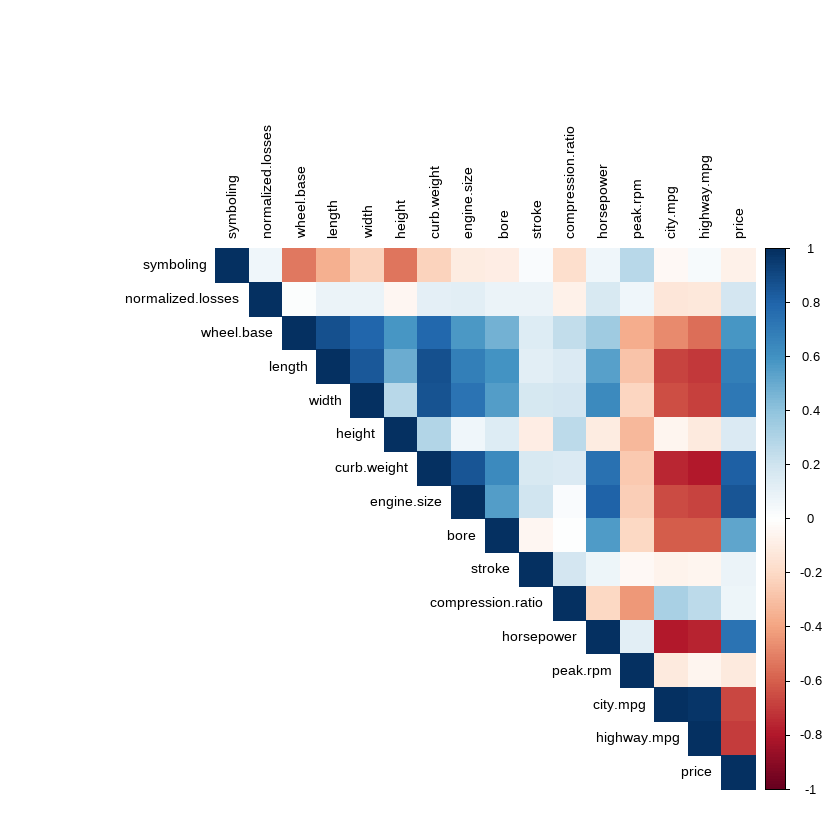

In [128]:
# (c) Graficar la matriz de correlación utilizando la función corrplot
corrplot(cor_pearson, method = "color", type = "upper", tl.cex = 0.9, tl.col = "black")

## 5. Load the data set USJudgeRatings, from the datasets package, containing lawyers’ ratings of state judges in the US Superior Court regarding a set of attributes.


In [129]:
# Cargar el paquete datasets
library(datasets)

# Cargar el conjunto de datos USJudgeRatings
data(USJudgeRatings)

### (a) Apply the function prcomp() to obtain the principal components. Inspect how each variable is obtained by the linear combination of each component.

In [131]:
summary(USJudgeRatings)

      CONT             INTG            DMNR            DILG      
 Min.   : 5.700   Min.   :5.900   Min.   :4.300   Min.   :5.100  
 1st Qu.: 6.850   1st Qu.:7.550   1st Qu.:6.900   1st Qu.:7.150  
 Median : 7.300   Median :8.100   Median :7.700   Median :7.800  
 Mean   : 7.437   Mean   :8.021   Mean   :7.516   Mean   :7.693  
 3rd Qu.: 7.900   3rd Qu.:8.550   3rd Qu.:8.350   3rd Qu.:8.450  
 Max.   :10.600   Max.   :9.200   Max.   :9.000   Max.   :9.000  
      CFMG            DECI            PREP            FAMI      
 Min.   :5.400   Min.   :5.700   Min.   :4.800   Min.   :5.100  
 1st Qu.:7.000   1st Qu.:7.100   1st Qu.:6.900   1st Qu.:6.950  
 Median :7.600   Median :7.700   Median :7.700   Median :7.600  
 Mean   :7.479   Mean   :7.565   Mean   :7.467   Mean   :7.488  
 3rd Qu.:8.050   3rd Qu.:8.150   3rd Qu.:8.200   3rd Qu.:8.250  
 Max.   :8.700   Max.   :8.800   Max.   :9.100   Max.   :9.100  
      ORAL            WRIT            PHYS            RTEN      
 Min.   :4.700   M

In [130]:
# Realizar el análisis de componentes principales
pca <- prcomp(USJudgeRatings, scale. = TRUE)

In [132]:
summary(pca)

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     3.1833 1.05078 0.57698 0.50383 0.29061 0.19310 0.14030
Proportion of Variance 0.8445 0.09201 0.02774 0.02115 0.00704 0.00311 0.00164
Cumulative Proportion  0.8445 0.93647 0.96421 0.98537 0.99240 0.99551 0.99715
                           PC8     PC9    PC10    PC11    PC12
Standard deviation     0.12416 0.08851 0.07491 0.05708 0.04539
Proportion of Variance 0.00128 0.00065 0.00047 0.00027 0.00017
Cumulative Proportion  0.99844 0.99909 0.99956 0.99983 1.00000

In [136]:
length(USJudgeRatings)

[1] 12

In [135]:
length(pca)

[1] 5

Se observa que existe una reduccion de la dimensionalidad despues de aplicar PCA

In [137]:
head(pca)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
CONT,0.003075143,-0.932890644,0.334756548,0.058576867,0.093438368,-0.004064432,0.005214784,-6.006597e-02,0.02514533,-0.03038881,0.0145329260,-0.007940919
INTG,-0.288550775,0.182040993,0.549360126,0.173977074,-0.014543880,0.369937339,-0.449810741,3.341645e-01,0.27537794,0.10897641,-0.1125535650,0.009848658
DMNR,-0.286884206,0.197565743,0.556490386,-0.124412022,-0.228832817,-0.394724667,0.466747889,-2.470974e-01,0.19910004,-0.07241282,0.1343234234,0.059121657
DILG,-0.304354091,-0.036304667,-0.163629910,0.321395544,-0.301936920,0.598676072,0.209710731,-3.548587e-01,-0.03977180,-0.38339165,0.0709517642,0.053790339
CFMG,-0.302572733,-0.168393523,-0.207341904,0.012949223,-0.448430522,-0.085728870,0.246903359,7.135261e-01,-0.14342471,0.09850310,0.1658680927,0.025082947
DECI,-0.301891969,-0.127877299,-0.297902771,0.030491779,-0.424003128,-0.392609484,-0.536429933,-3.024227e-01,0.25823773,0.06743847,-0.1284999526,0.044141604
PREP,-0.309406446,-0.032230248,-0.151869345,0.213656069,0.202853400,0.083216652,0.335390036,-1.536754e-01,0.10876864,0.67986284,-0.3187612119,-0.273286884
FAMI,-0.306679527,0.001315183,-0.195290454,0.200651140,0.507470003,-0.101538704,-0.036378004,2.038889e-02,0.22306628,0.04004599,0.5733628652,0.421739844
ORAL,-0.312708348,0.003625720,-0.002150634,-0.007441042,0.246059421,-0.150272440,0.057580177,9.062990e-02,-0.29951714,-0.25599455,-0.6386061655,0.494391025
WRIT,-0.311061231,0.031378756,-0.056045596,0.137104995,0.305562842,-0.238172386,-0.060899994,1.261203e-01,-0.02497324,-0.47478254,0.0004056397,-0.696107204


In [138]:
head(USJudgeRatings)

,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"AARONSON,L.H.",5.7,7.9,7.7,7.3,7.1,7.4,7.1,7.1,7.1,7.0,8.3,7.8
"ALEXANDER,J.M.",6.8,8.9,8.8,8.5,7.8,8.1,8.0,8.0,7.8,7.9,8.5,8.7
"ARMENTANO,A.J.",7.2,8.1,7.8,7.8,7.5,7.6,7.5,7.5,7.3,7.4,7.9,7.8
"BERDON,R.I.",6.8,8.8,8.5,8.8,8.3,8.5,8.7,8.7,8.4,8.5,8.8,8.7
"BRACKEN,J.J.",7.3,6.4,4.3,6.5,6.0,6.2,5.7,5.7,5.1,5.3,5.5,4.8
"BURNS,E.B.",6.2,8.8,8.7,8.5,7.9,8.0,8.1,8.0,8.0,8.0,8.6,8.6


### (b) Load the package ggbiplot and plot the two first components with the function ggbiplot(). You can label each point with the lawyer’s name by setting the labels parameter

In [145]:
install.packages("ggplot2")

package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\aleja\AppData\Local\Temp\RtmpEJsNan\downloaded_packages


In [148]:
# Cargar el paquete ggbiplot
library("ggplot2")

In [154]:
library(devtools)

In [158]:
install.packages("installr")

package 'installr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\aleja\AppData\Local\Temp\RtmpEJsNan\downloaded_packages


In [160]:
library(installr)
install.Rtools()

ERROR: Error in winDialog(type = "yesno", message = question): winDialog() cannot be used non-interactively


In [156]:
install_github("vqv/ggbiplot", ref = "experimental")


Please download and install Rtools 4.0 from https://cran.r-project.org/bin/windows/Rtools/.





-- R CMD build -----------------------------------------------------------------



Please download and install Rtools 4.0 from https://cran.r-project.org/bin/windows/Rtools/.



* checking for file 'C:\Users\aleja\AppData\Local\Temp\RtmpEJsNan\remotes4cc861ca65b2\vqv-ggbiplot-81e70b5/DESCRIPTION' ... OK
* preparing 'ggbiplot':
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a 'data/datalist' file should be added
* building 'ggbiplot_0.55.tar.gz'



Warning message in i.p(...):
"installation of package 'C:/Users/aleja/AppData/Local/Temp/RtmpEJsNan/file4cc87fac432e/ggbiplot_0.55.tar.gz' had non-zero exit status"


In [157]:
# Cargar el paquete ggbiplot
library(ggbiplot)

ERROR: Error in library(ggbiplot): there is no package called 'ggbiplot'


In [161]:
# Visualizar las dos primeras componentes con ggbiplot
ggbiplot(pca, choices = c(1, 2), labels = rownames(USJudgeRatings))

ERROR: Error in ggbiplot(pca, choices = c(1, 2), labels = rownames(USJudgeRatings)): no se pudo encontrar la función "ggbiplot"


Esto deberia funcionar cuando no se trabaje en un ambiente 